In [1]:
!pip install torchsummary

In [1]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import os
import numpy as np
#import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
import torchvision
import functools
import torchvision.models as models
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from skimage import io, transform
from torch.autograd import Variable
from torchvision.utils import save_image
#from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from tqdm import tqdm
from torchvision.utils import save_image

In [3]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
n_channels=1
# VAE latent size
latent_size = 50

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_gpus = torch.cuda.device_count() if device=='cuda' else 1
batch_size = 160 * n_gpus

lr = 0.0002

beta1=0.5
beta2=0.999
    
DATA_PATH = '...'
SAVE_MODEL_PATH = ''

In [4]:
print(device)

cpu


In [5]:
loss_per_batch = []
loss = []

loss = np.genfromtxt('logs/losses.txt')
loss_per_batch = np.genfromtxt('logs/loss_per_batch.txt')

In [6]:
x_batch=np.arange(1,loss_per_batch.shape[0]+1)
x = np.arange(1,loss.shape[0]+1)

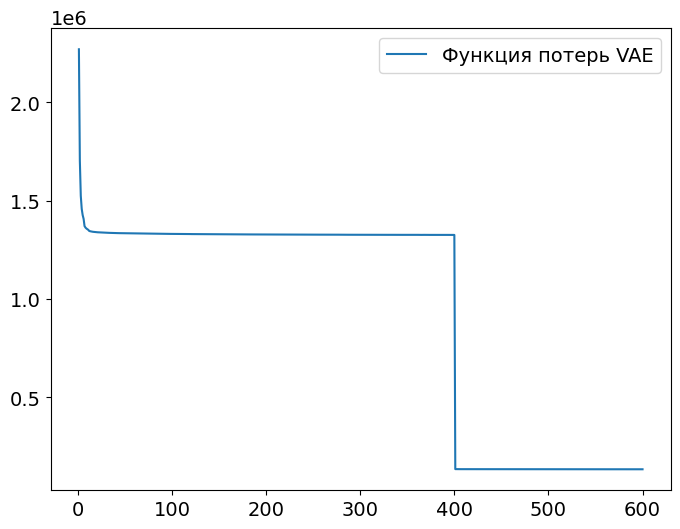

In [10]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})

plt.plot(x, loss, label='Функция потерь VAE')
plt.legend()

plt.show()

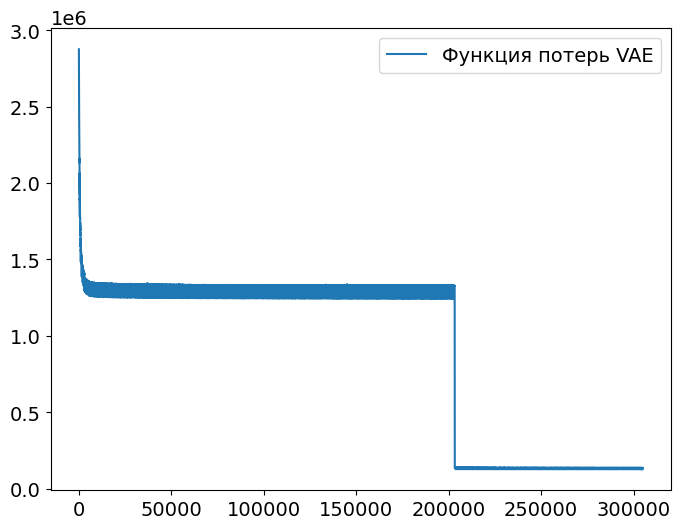

In [11]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})

plt.plot(x_batch, loss_per_batch, label='Функция потерь VAE')
plt.legend()

plt.show()
